# Gülçin Türker

# Data

In [245]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, accuracy_score, classification_report, f1_score
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

In [246]:
df = pd.read_csv('diamonds.csv')
df.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low


In [247]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [248]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool

In [249]:
df.loc[df['x']==0]

,index,carat,cut,color,clarity,depth,table,x,y,z,price
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,0.0,6.62,0.0,Low
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,0.0,0.00,0.0,Low
15951,15952,1.14,Fair,G,VS1,57.5,67.0,0.0,0.00,0.0,Low
24520,24521,1.56,Ideal,G,VS2,62.2,54.0,0.0,0.00,0.0,High
26243,26244,1.20,Premium,D,VVS1,62.1,59.0,0.0,0.00,0.0,Very High
27429,27430,2.25,Premium,H,SI2,62.8,59.0,0.0,0.00,0.0,Very High
49556,49557,0.71,Good,F,SI2,64.1,60.0,0.0,0.00,0.0,Very Low
49557,49558,0.71,Good,F,SI2,64.1,60.0,0.0,0.00,0.0,Very Low


In [250]:
df['x'] = df['x'].replace(0,df['x'].mean()) 
df['y'] = df['y'].replace(0,df['y'].mean()) 
df['z'] = df['z'].replace(0,df['z'].mean())

In [251]:
df.loc[11182]

index        11183
carat         1.07
cut          Ideal
color            F
clarity        SI2
depth         61.6
table           56
x          5.73116
y             6.62
z          3.53873
price          Low
Name: 11182, dtype: object

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [253]:
df.isna().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

# Explatory Data Analysis

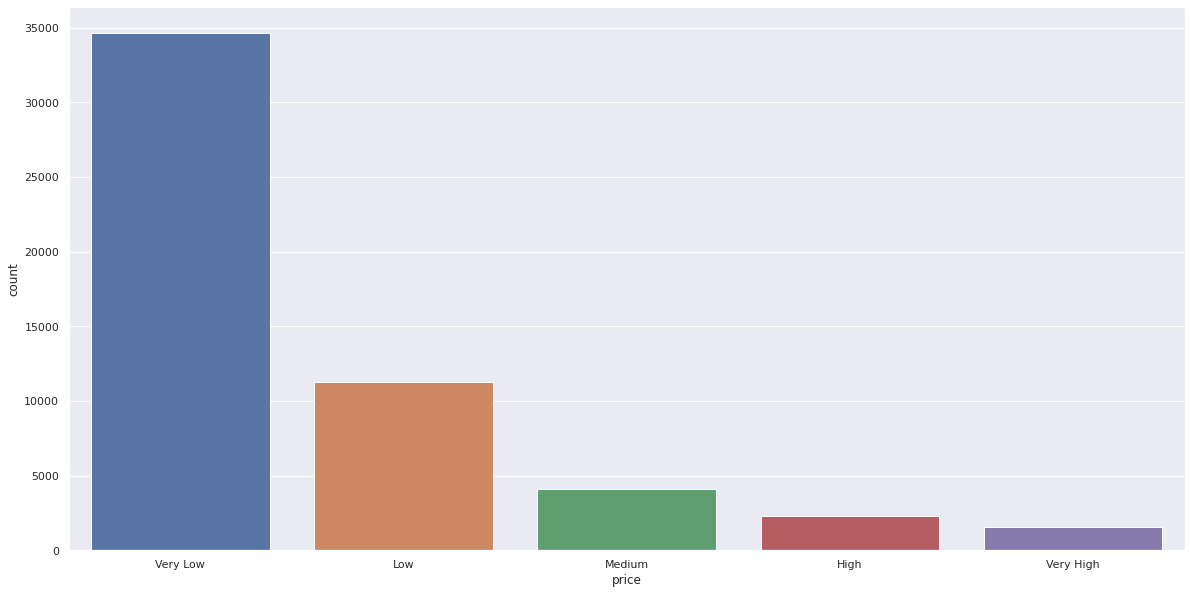

In [254]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="price", data=df)

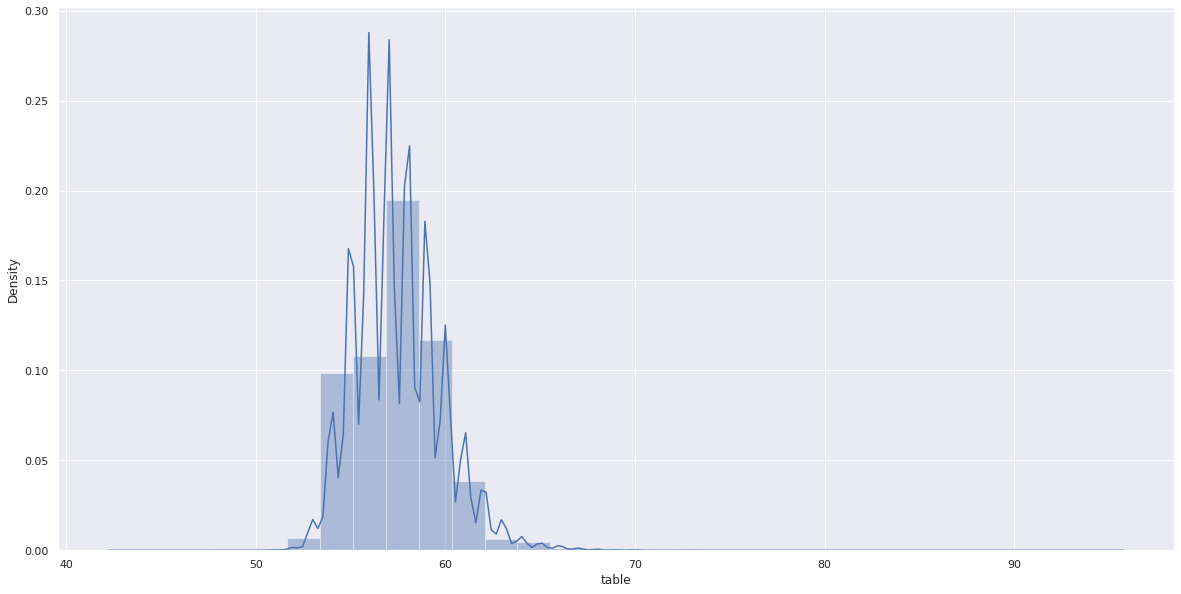

In [255]:
sns.distplot(df['table'], bins=30)
plt.show()

# Preprocessing

In [256]:
df['volume'] = df['x']*df['y']*df['z']
df.drop(['x','y','z'],axis=1,inplace=True)

In [257]:
df.head()

,index,carat,cut,color,clarity,depth,table,price,volume
0,1,0.23,Ideal,E,SI2,61.5,55.0,Very Low,38.202030
1,2,0.21,Premium,E,SI1,59.8,61.0,Very Low,34.505856
2,3,0.23,Good,E,VS1,56.9,65.0,Very Low,38.076885
3,4,0.29,Premium,I,VS2,62.4,58.0,Very Low,46.724580
4,5,0.31,Good,J,SI2,63.3,58.0,Very Low,51.917250


In [258]:
#cut
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [259]:
#color
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [260]:
#clarity
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [261]:
df['cut'] = df['cut'].apply(lambda x: 1 if x=='Fair' else(2 if x=='Good' 
                                           else(3 if x=='Very Good' 
                                           else(4 if x=='Premium' else 5))))

df['color'] = df['color'].apply(lambda x: 1 if x=='J' else(2 if x=='I'
                                          else(3 if x=='H'
                                          else(4 if x=='G'
                                          else(5 if x=='F'
                                          else(6 if x=='E' else 7))))))

df['clarity'] = df['clarity'].apply(lambda x: 1 if x=='I1' else(2 if x=='SI2'
                                          else(3 if x=='SI1'
                                          else(4 if x=='VS2'
                                          else(5 if x=='VS1'
                                          else(6 if x=='WS2'
                                          else 7 if x=='WS1' else 8))))))

In [262]:
scaler = MinMaxScaler()
df[['cut','color','clarity']] = scaler.fit_transform(df[['cut','color','clarity']])

df['score'] = df['cut'] + df['color'] + df['clarity']

In [263]:
df.drop(['cut','color','clarity', 'index'],axis=1,inplace=True)
df.head()

,carat,depth,table,price,volume,score
0,0.23,61.5,55.0,Very Low,38.202030,1.976190
1,0.21,59.8,61.0,Very Low,34.505856,1.869048
2,0.23,56.9,65.0,Very Low,38.076885,1.654762
3,0.29,62.4,58.0,Very Low,46.724580,1.345238
4,0.31,63.3,58.0,Very Low,51.917250,0.392857


In [264]:
df = df[['carat',
        'depth',
        'table',
        'volume',
        'score',
        'price']]
df.head()

,carat,depth,table,volume,score,price
0,0.23,61.5,55.0,38.202030,1.976190,Very Low
1,0.21,59.8,61.0,34.505856,1.869048,Very Low
2,0.23,56.9,65.0,38.076885,1.654762,Very Low
3,0.29,62.4,58.0,46.724580,1.345238,Very Low
4,0.31,63.3,58.0,51.917250,0.392857,Very Low


<AxesSubplot:>

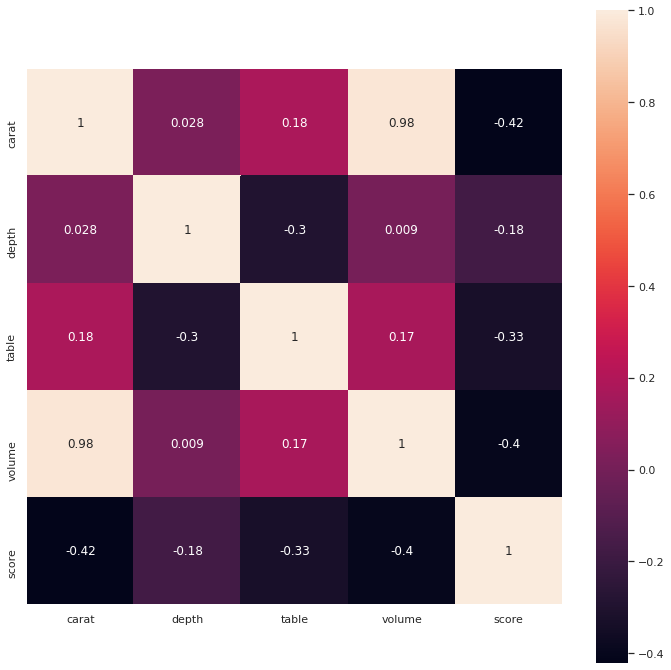

In [265]:
plt.figure(figsize=(12, 12))
correlation = df.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
sns.heatmap(correlation, vmax=1, annot=True,square=True)

<Figure size 1152x576 with 0 Axes>

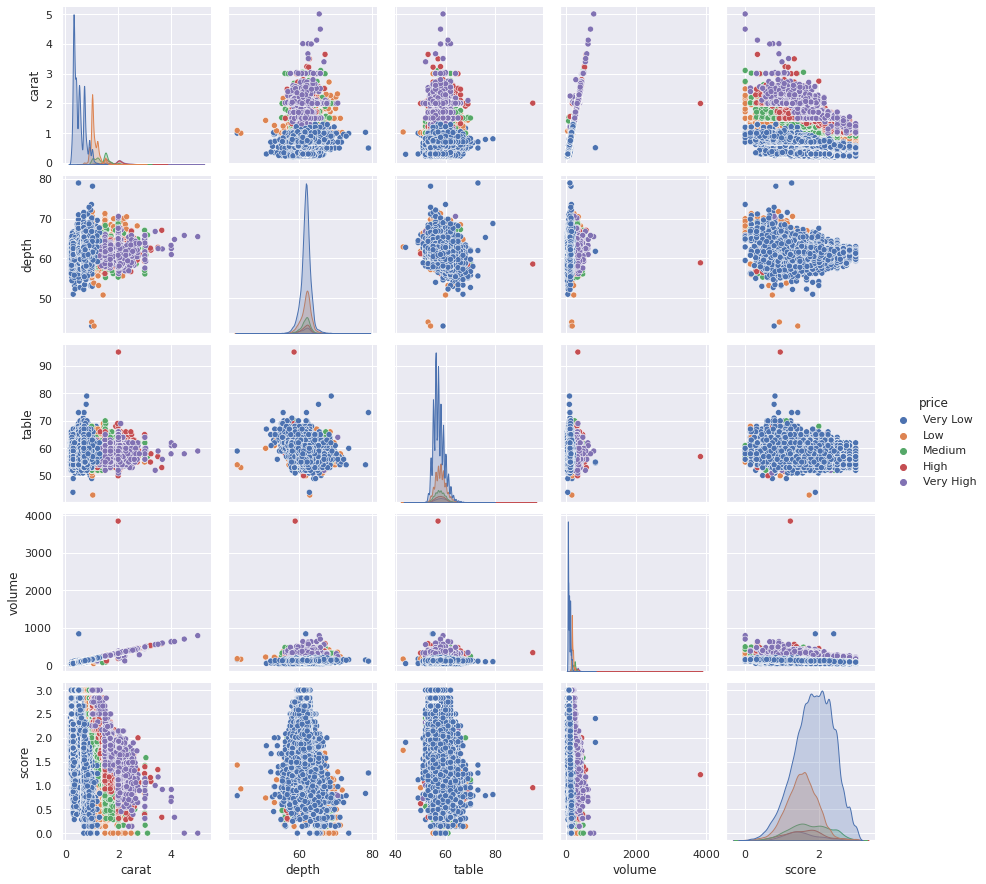

<Figure size 1152x576 with 0 Axes>

In [266]:
sns.pairplot(df, hue='price')
plt.figure(figsize=(16,8))

In [267]:
df['price'] = df['price'].apply(lambda x: 0 if x=='Very Low' else(1 if x=='Low'
                                          else(2 if x=='Medium'
                                          else(3 if x=='High' else 4))))
df.head()

,carat,depth,table,volume,score,price
0,0.23,61.5,55.0,38.202030,1.976190,0
1,0.21,59.8,61.0,34.505856,1.869048,0
2,0.23,56.9,65.0,38.076885,1.654762,0
3,0.29,62.4,58.0,46.724580,1.345238,0
4,0.31,63.3,58.0,51.917250,0.392857,0


In [268]:
from sklearn.model_selection import train_test_split

X = df.drop(['price'],1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# ML Application

In [269]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Linear regression accuracy: ', linear_regression.score(X_test,y_test))

ridge = Ridge(normalize=True)
ridge.fit(X_train,y_train)
print('Ridge regression accuracy: ',ridge.score(X_test,y_test))

lasso = Lasso(normalize=True)
lasso.fit(X_train,y_train)
print('Lasso regression accuracy: ',ridge.score(X_test,y_test))

elastic_net = ElasticNet()
elastic_net.fit(X_train,y_train)
print('Elastic net accuracy: ',elastic_net.score(X_test,y_test))

Linear regression accuracy:  0.795503822535478
Ridge regression accuracy:  0.6693144574364354
Lasso regression accuracy:  0.6693144574364354
Elastic net accuracy:  0.6680089175880426


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)
print('Decision Tree train accuracy: ',clf.score(X_train,y_train))
print('Decision Tree test accuracy: ',clf.score(X_test,y_test))

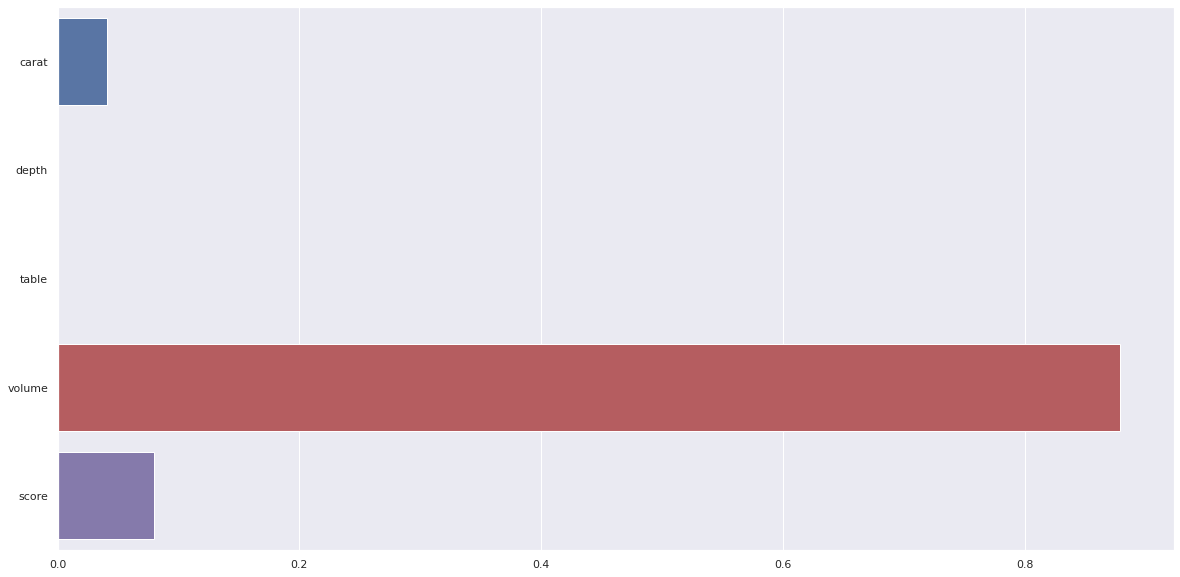

In [271]:
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

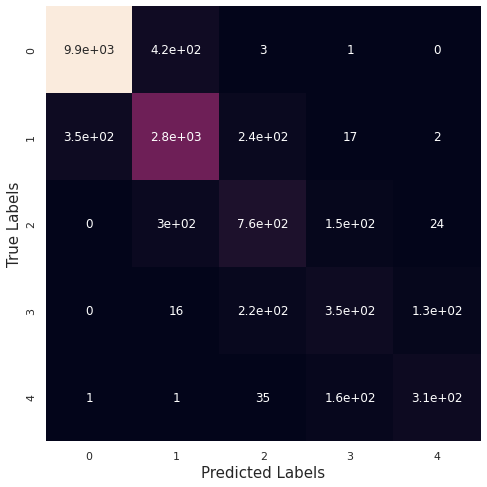

In [272]:
pred = clf.predict(X_test)
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [273]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.708612511473202
Recall = 0.6990179488536605
Accuracy = 0.8720182919293041
F1 Score = 0.7034462668159714


# XGBoost

In [280]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':5}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

In [281]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[1.3357579e-02, 2.1489419e-02, 9.0621062e-02, 3.8904759e-01,
        4.8548433e-01],
       [9.9619484e-01, 1.4296133e-03, 8.0320984e-04, 7.9762680e-04,
        7.7471742e-04],
       [9.9410170e-01, 3.2930721e-03, 8.8088016e-04, 8.7475771e-04,
        8.4963301e-04],
       [9.9275970e-01, 4.6920637e-03, 8.6158438e-04, 8.5559557e-04,
        8.3102135e-04],
       [9.9410170e-01, 3.2930721e-03, 8.8088016e-04, 8.7475771e-04,
        8.4963301e-04],
       [8.3038479e-02, 8.8685358e-01, 1.7105818e-02, 6.5957797e-03,
        6.4063366e-03],
       [1.3357579e-02, 2.1489419e-02, 9.0621062e-02, 3.8904759e-01,
        4.8548433e-01],
       [8.7874206e-03, 2.8239705e-02, 1.9325124e-01, 6.1451131e-01,
        1.5521033e-01],
       [9.9682081e-01, 8.0212718e-04, 8.0371456e-04, 7.9812802e-04,
        7.7520427e-04],
       [1.1926837e-01, 8.5415149e-01, 1.4057451e-02, 6.3525648e-03,
        6.1701075e-03]], dtype=float32)

In [282]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [283]:
best_preds

array([4, 0, 0, ..., 1, 1, 1])

In [284]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.7414255854785889
Recall = 0.7474771270802767
Accuracy = 0.8917315535780497


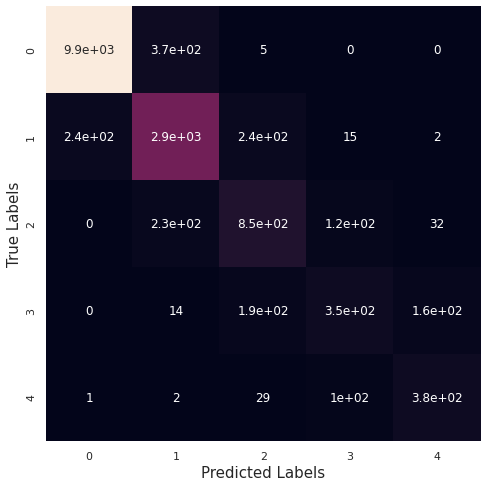

In [285]:
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
                    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, 
                    objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=42)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

# Evaluation

In [ ]:
#It is possible to improve model with the right feature engineering.